In [1]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = '' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [27]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

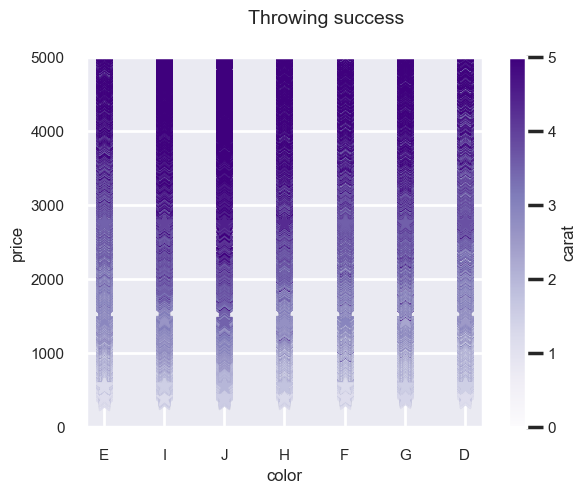

In [28]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [29]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

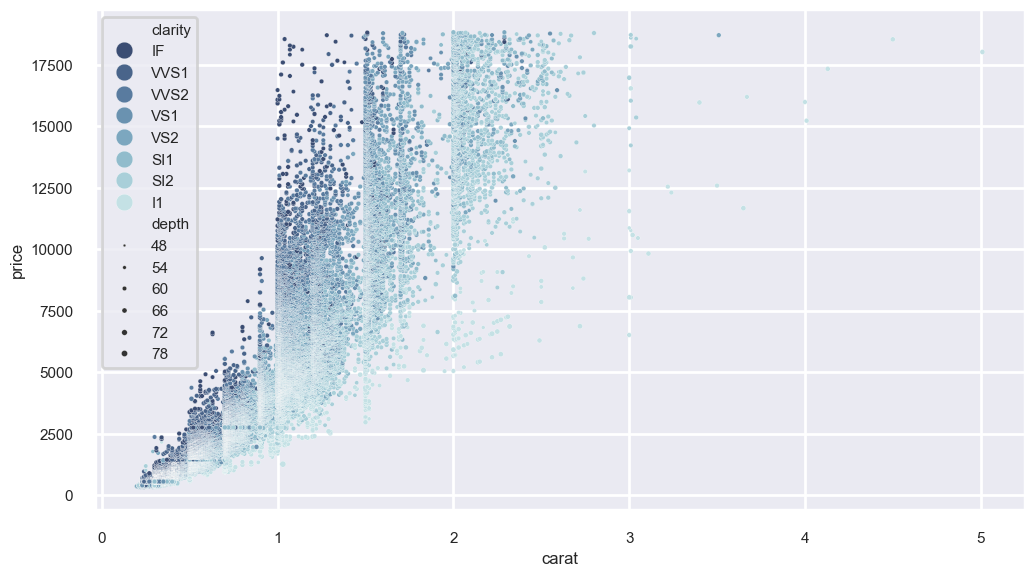

In [30]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

C:\Users\yelin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


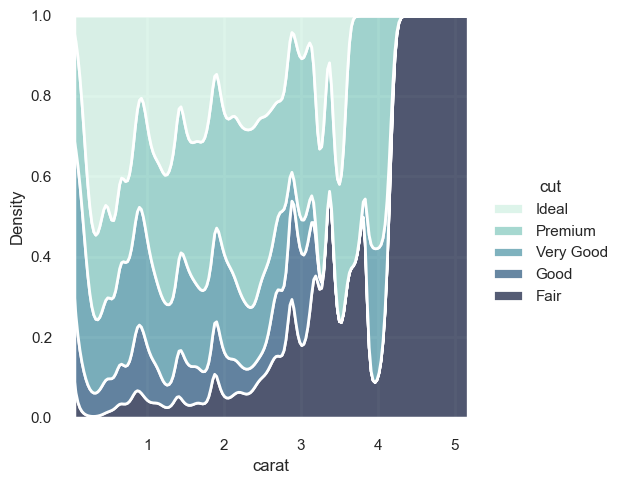

In [31]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

1번:
- 목적: 다이아몬드의 색깔별 캐럿수와 가격의 상관관계
- 효과: 캐럿수를 그라데이션으로 나타냄으로서 캐럿 수가 높아질수록 가격이 높아지는 경향성을 한눈에 확인할 수 있도록 했다.
- 개선점: color인덱스의 각각이 어떤 색을 의미하는지 다이아몬드에 관한 지식이 없는 사람들은 모를 수 있다. 등급 순서대로 정렬하거나  E, I, J H, F, G, D에 대한 설명이 있으면 좋을 것 같다. 또한, 점들이 너무 빽빽해서 색깔간에 캐럿수에 따른 가격이 차이가 있는지 (e.g. J 색상이 다른 색상들에 비해 같은 캐럿수라도 좀 더 싼지)와 같은 경향성이 잘 보이지 않는다. 그래프의 세로축을 늘리고, 각 색상 별 가격 평균값 선을 추가로 나타내는 방식으로 이러한 경향이 있는지 여부를 더 잘 확인할 수 있게 할 수 있다. 또, 제목이 그래프의 목적을 잘 나타내지 못하므로, 그래프의 제목을 목적과 동일하게 변경하고, y축의 최댓값을 늘린다.

2번:
- 목적: 다이아몬드의 캐럿, 투명도, 채굴 깊이와 가격의 상관관계
- 효과: 다이아몬드의 투명도를 색상으로 구분하여 투명도가 높을수록(색상이 진할수록) 가격이 높아지는 상관관계를 한눈에 확인할 수 있다. 마찬가지로 캐럿수가 커질수록 가격이 높아지는 양의 상관관계를 scatter plot의 점 분포로 한눈에 확인할 수 있다.
- 개선점: 데이터 수가 너무 많고 점이 작아 채굴 깊이 (depth)에 관한 정보는 잘 알아볼 수 없다. depth 정보가 좀 더 잘 보이게끔 각 점의 원 크기를 키우고 depth별 원의 크기 차이가 크게 수정하면 좋을 것 같다. 또, 그래프의 제목을 추가하면 보이고자 하는 메시지를 더 잘 나타낼 수 있다.

3번:
- 목적: 다이아몬드의 캐럿별 컷 방법의 비율
- 효과: 캐럿 수에 따라 다이아몬드가 어떻게 커팅되었는지 그 비율을 확인할 수 있다. 캐럿 수가 작은 것이 대체로 ideal 컷의 비율이 높고, 캐럿수가 4가 넘어가면 fair컷의 비율이 압도적으로 높아짐을 색상 구분을 통해 쉽게 확인할 수 있다.
- 개선점: 2번과 마찬가지로 그래프의 제목이 있다면 그래프에서 말하고자 하는 바를 더 쉽게 확인할 수 있을 것이다. 또, 이 그래프는 캐럿에 따른 컷의 비율을 나타내는 것이므로 실제 데이터 수는 알기 어렵다. (캐럿 수가 커질수록 데이터 수가 적을 것이라든지...) 


2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

    1) df value를 color 등급이 높은 순으로 sort하여 xlabel이 퀄리티 순서대로 나타나도록 했다.
    2) 그래프의 세로길이가 더 길게 비율을 조정하여 색상 별 가격 차이가 더 잘 나타나게 조정했다.
    3) 각 색상별 평균 가격을 구하여 해당 값을 빨간 선으로 추가로 표기했다. (가장 등급이 낮은 J가 평균 가격이 높아진 이유는 등급이 높은 다이아몬드일수록 크기가 큰 다이아몬드가 발견될 확률이 낮아지기 때문으로 보임. 즉, 크기가 큰 다이아몬드(=비쌈)는 낮은 등급이 많다.)
    4) color에 관한 부가설명을 xlabel에 추가했다. (D가 퀄리티가 좋으며, J로 갈수록 퀄리티가 낮음, 빨간 선에 관한 설명)
    5) ylabel 최댓값을 20000으로 수정했다.

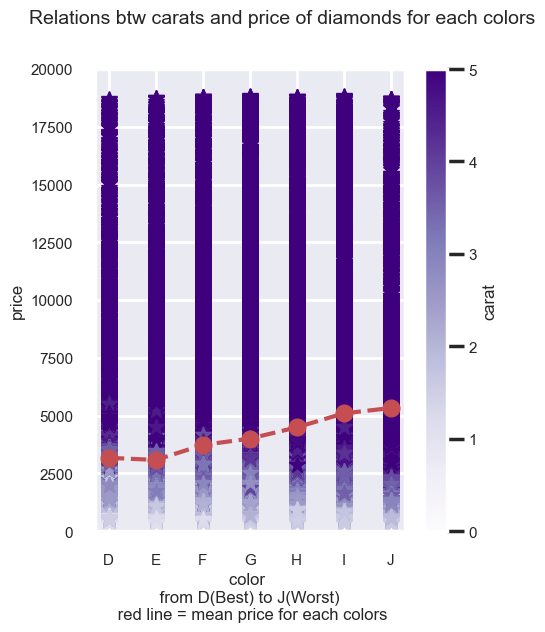

In [37]:
df = df.sort_values(by=['color']) # 컬러를 등급 순서대로 정렬
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])


cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots(figsize=(5,6)) # 그래프 세로 길이 더 길게 조정
fig.suptitle("Relations btw carats and price of diamonds for each colors", size=14) # 제목을 그래프의 성격을 더 잘 나타내게끔 변경

for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")

# 각 색깔 별 평균 price 선을 빨간 색으로 추가
grouped = df['price'].groupby(df['color']).mean()
ax.plot(grouped,'ro--')

ax.set_xlabel("color \n from D(Best) to J(Worst) \n red line = mean price for each colors") # color에 관한 부가 설명
ax.set_ylabel("price")
ax.set_ylim(0, 20000) #y라벨 최댓값을 20000으로 수정

plt.show()

In [36]:
print(grouped) #색상 별 평균 가격

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.
1) product 종류가 profit과 팔리는 Sales양에 영향을 미치는지 확인
2) 독립변수 : sales, product | 종속변수: profit
    - sales: 팔린 양
    - product: 판매 품목
    - profit: 판매금액에서 원가, 마케팅 등 기타 비용을 제한 순수익
3) product 종류에 의해 profit이 좌우된다기보다는, Sales 양과 profit이 관련이 있음을 확인했다.
4) sales가 많으면 대부분 손해를 보지 않고, sales가 적으면 대부분 손해를 보는 경향을 확인함. sales가 많을 경우, 전체 판매금액 대비 마케팅 비용, 원가 등 기타 비용이 차지하는 비율이 낮아지기 때문으로 예측할 수 있음. product 종류와 profit 사이에 특별한 경향을 확인하지 못했으므로, 다른 독립변수와 수익성 사이의 관계를 확인해야 함.

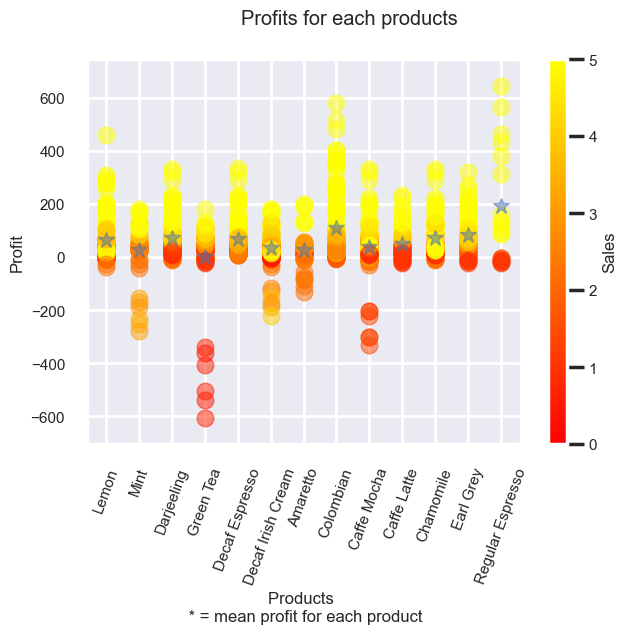

In [79]:
data = pd.read_csv('Coffee_Chain_Sales .csv')
zipped_data = zip(data['Product'],data['Sales'],data['Profit'])

cmap = plt.colormaps["autumn"]
fig, ax = plt.subplots(figsize=(7,5))
fig.suptitle("Profits for each products") # 각 품목별 profit

for Product, Sales, Profit in zipped_data:
    ax.plot(Product,
            Profit,
            marker='o', alpha=0.5,
            color=cmap(Sales))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="Sales")

ax.tick_params(axis='x', rotation=70)
ax.set_xlabel("Products \n * = mean profit for each product")  # * 표시에 관한 부가설명
ax.set_ylabel("Profit")
ax.set_ylim(min(data['Profit']-100),max(data['Profit'])+100)


# 각 product 별 평균 profit을 파란 *로 표기
grouped_coffee = data['Profit'].groupby(data['Product']).mean()
ax.plot(grouped_coffee,'b*',alpha=0.5)


plt.show()